In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

from scipy.optimize import curve_fit

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
N = 1000
D = 2
p = 0.2

n_range = np.arange(10, N, 20)
greedy_forward_path_weights = []
greedy_backward_path_weights = []
greedy_forward_num_edges = []
greedy_backward_num_edges = []

for n in tqdm(n_range):
    DAG = dag.CubeSpaceGraph(lp=p)
    R = dag.cube_space_interval(n, D)
    G = DAG.generate_graph(R, weighted=True)
    greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
    greedy_backward = DAG.traverse_path(dag.greedy_shortest_path, 'backward')
    greedy_forward_path_weights.append(DAG.get_path_weight(greedy_forward))
    greedy_backward_path_weights.append(DAG.get_path_weight(greedy_backward[::-1]))
    greedy_forward_num_edges.append(len(greedy_forward))
    greedy_backward_num_edges.append(len(greedy_backward))

greedy_forward_path_weights = np.asarray(greedy_forward_path_weights)
greedy_backward_path_weights = np.asarray(greedy_backward_path_weights)
greedy_forward_num_edges = np.asarray(greedy_forward_num_edges)
greedy_backward_num_edges = np.asarray(greedy_backward_num_edges)
greedy_forward_avg_weight = greedy_forward_path_weights / greedy_forward_num_edges
greedy_backward_avg_weight = greedy_backward_path_weights / greedy_backward_num_edges


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


In [4]:
def plot_power_law_fit(n_range, y, power, title="", y_label="Path weight"):
    # Define the power law function
    power_law = lambda x, a: a + power*np.log(x)

    # Fit the power law function to the data
    n_range = n_range.astype('float64')
    params, _ = curve_fit(power_law, n_range, np.log(y))
    a_fit = np.exp(params[0])

    # Plot the original data and the fitted power law
    plt.scatter(n_range, y, marker='.')
    plt.title(title)
    plt.xlabel('Number of nodes N')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.plot(n_range, a_fit*pow(n_range, power), label='Power law fit: $L=%.2f \cdot N^{%.2f}$' % (a_fit, power), color='red')
    plt.legend()
    # Set log-log scale
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

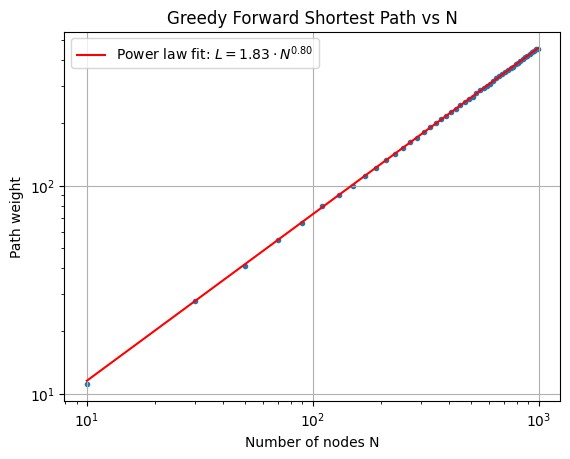

In [5]:
plot_power_law_fit(n_range, greedy_forward_path_weights, 1-p, title="Greedy Forward Shortest Path vs N")

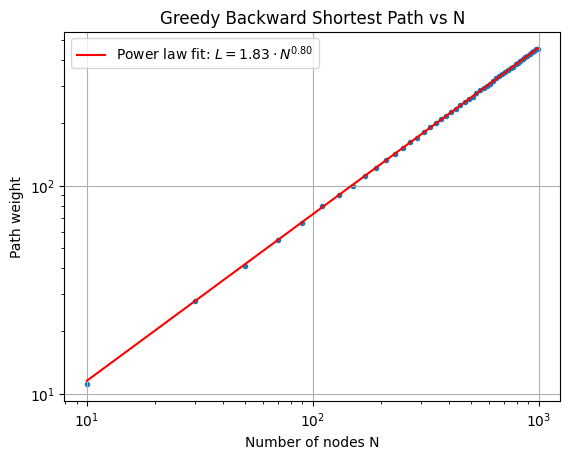

In [6]:
plot_power_law_fit(n_range, greedy_backward_path_weights, 1-p, title="Greedy Backward Shortest Path vs N")

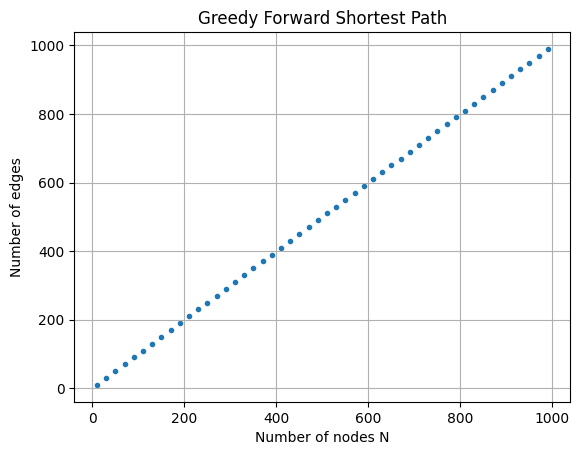

In [7]:
plt.scatter(n_range, greedy_forward_num_edges, marker='.')
plt.title('Greedy Forward Shortest Path')
plt.xlabel('Number of nodes N')
plt.ylabel('Number of edges')
plt.grid(True)
plt.show()

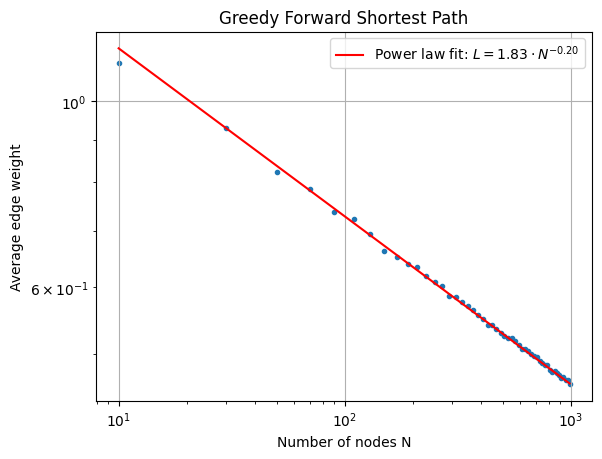

In [8]:
plot_power_law_fit(n_range, greedy_forward_avg_weight, -p, title="Greedy Forward Shortest Path", y_label="Average edge weight")

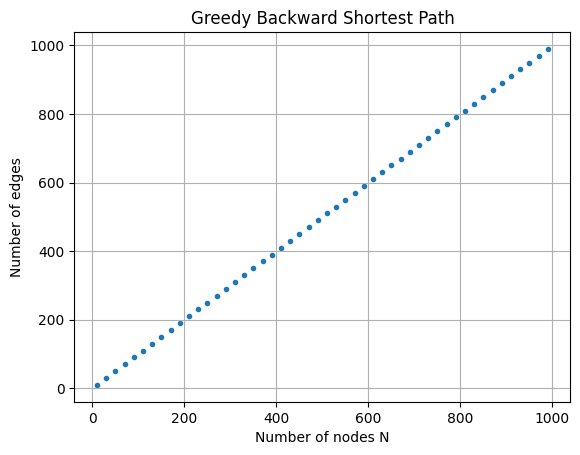

In [9]:
plt.scatter(n_range, greedy_backward_num_edges, marker='.')
plt.title('Greedy Backward Shortest Path')
plt.xlabel('Number of nodes N')
plt.ylabel('Number of edges')
plt.grid(True)
plt.show()

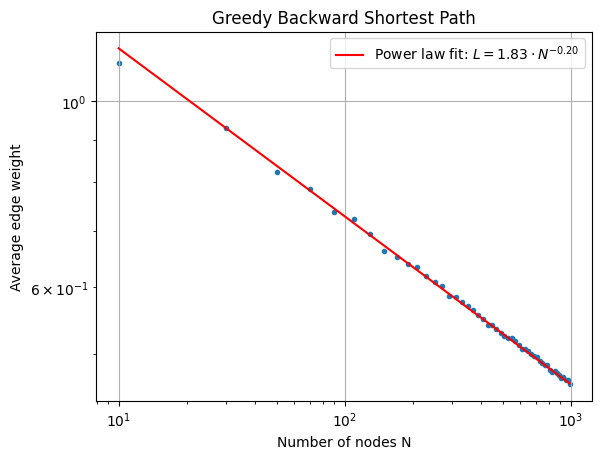

In [10]:
plot_power_law_fit(n_range, greedy_backward_avg_weight, -p, title="Greedy Backward Shortest Path", y_label="Average edge weight")